In [5]:
from autograd import V, L, F 
from optimiser import SGD, Adagrad, Adam
import matplotlib.pyplot as plt
import numpy as np

W1 = V.randn((1, 100), requires_grad=True, name='W1')
b1 = V.randn((100,), requires_grad=True, name='b1')

W2 = V.randn((100, 100), requires_grad=True, name='W2')
b2 = V.randn((100,), requires_grad=True, name='b2')

W3 = V.randn((100, 1), requires_grad=True, name='W3')
b3 = V.randn((1,), requires_grad=True, name='b3')

def model(x):
    x = x @ W1 + b1
    x = F.leakyrelu(x)
    x = x @ W2 + b2
    x = F.leakyrelu(x)
    x = x @ W3 + b3
    return x

# Function to match
def f(x):
    # return F.sigmoid(x * 10 - 5.0)
    return (F.sin(x * 5.0) + F.cos(x) * 5.0) * 10.0

# Training data
def get_data():
    x = V.uniform((1,1), -10.0, 10.0)
    y = f(x)
    return x, y

loss = L.huberloss
optimiser = SGD(W1, b1, W2, b2, W3, b3)

loss_val () var(27.86391350447716)
[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303

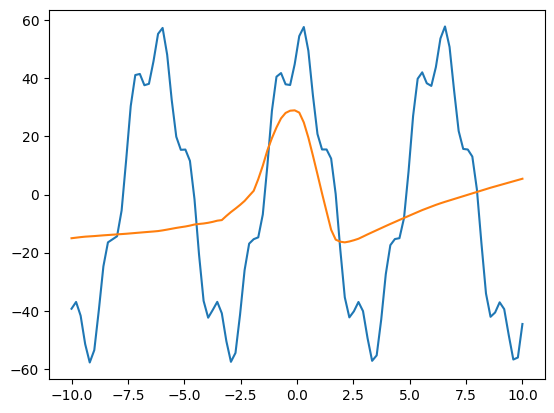

In [35]:
for e in range(10):
    x, y = get_data()

    y_pred = model(x)

    loss_val = loss(y_pred, y, keepdims=False)
    loss_val.backward()
    optimiser.step()

print("loss_val", loss_val.shape(), loss_val)

# Plotting
xs = [x for x in np.linspace(-10.0, 10.0, 100)]
ys = [f(V.of(x)).item() for x in xs]
ys_pred = [model(V.of([x])).item() for x in xs]
print(xs)
print(y)
print(ys_pred)

plt.plot(xs, ys, label='f(x)')
plt.plot(xs, ys_pred, label='model(x)')
plt.show()